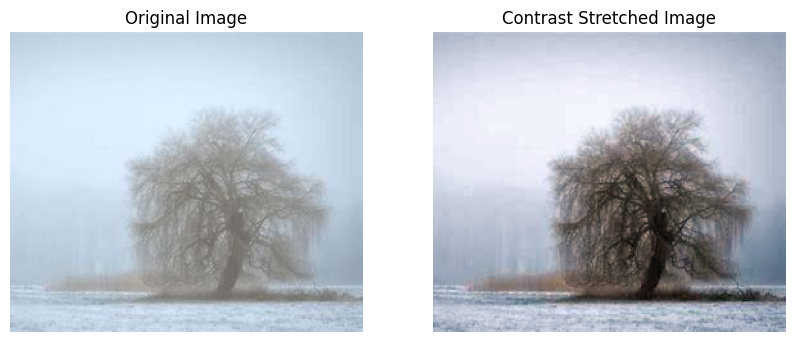

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure it's a color image)
image = cv2.imread('contrast1.jpg')  # Replace 'image.jpg' with the path to your color image

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found!")
else:
    # Split the image into three color channels (Blue, Green, Red)
    blue_channel, green_channel, red_channel = cv2.split(image)

    # Define the output intensity range (0 to 255)
    min_out = 0
    max_out = 255

    # Function to apply contrast stretching to each channel
    def contrast_stretching(channel):
        # Find the minimum and maximum pixel intensities in the channel
        min_in = np.min(channel)
        max_in = np.max(channel)

        # Apply the contrast stretching formula
        stretched_channel = ((channel - min_in) / (max_in - min_in)) * (max_out - min_out) + min_out

        # Convert the result to an unsigned 8-bit integer type
        return np.uint8(stretched_channel)

    # Apply contrast stretching to each channel
    stretched_blue = contrast_stretching(blue_channel)
    stretched_green = contrast_stretching(green_channel)
    stretched_red = contrast_stretching(red_channel)

    # Merge the stretched channels back into one color image
    stretched_image = cv2.merge([stretched_blue, stretched_green, stretched_red])

    # Display the original and contrast-stretched images side by side
    plt.figure(figsize=(10,5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title('Original Image')
    plt.axis('off')

    # Contrast Stretched Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title('Contrast Stretched Image')
    plt.axis('off')

    # Show the images
    plt.show()
